# Ensemble Methods
Ensemble methods improve prediction accuracy by aggregating predictions from multiple base learners (often weak models). Instead of relying on a single model, they combine the outputs of many, trained on different versions of the data, to produce a more stable and generalizable result.

According to [IBM](https://www.ibm.com/think/topics/boosting?mhsrc=ibmsearch_a&mhq=boosting),:

"Bagging and boosting are two main types of ensemble learning methods... In bagging, weak learners are trained in parallel, but in boosting, they learn sequentially. This means that a series of models is constructed and with each new model iteration, the weights of the misclassified data in the previous model are increased.... Another difference in which bagging and boosting differ are the scenarios in which they are used. For example, bagging methods are typically used on weak learners that exhibit high variance and low bias, whereas boosting methods are used when low variance and high bias are observed."

This notebook will focus on boosting. Please reference random_forest.ipynb(link) for more information on bagging. We will take a deeper look at AdaBoosting and gradient boosting.

## AdaBoosting
Adaptive boosting, or [AdaBoost](https://www.ibm.com/think/topics/boosting?mhsrc=ibmsearch_a&mhq=boosting), operates iteratively, identifying misclassified data points and adjusting their weights to minimize the training error. The model continues optimize in a sequential fashion until it yields the strongest predictor.

AdaBoost is often built on decision trees, which is the default option in sci-kit learn's [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html).

AdaBoost Accuracy: 0.7364

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.79      0.75      6988
           1       0.77      0.68      0.72      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



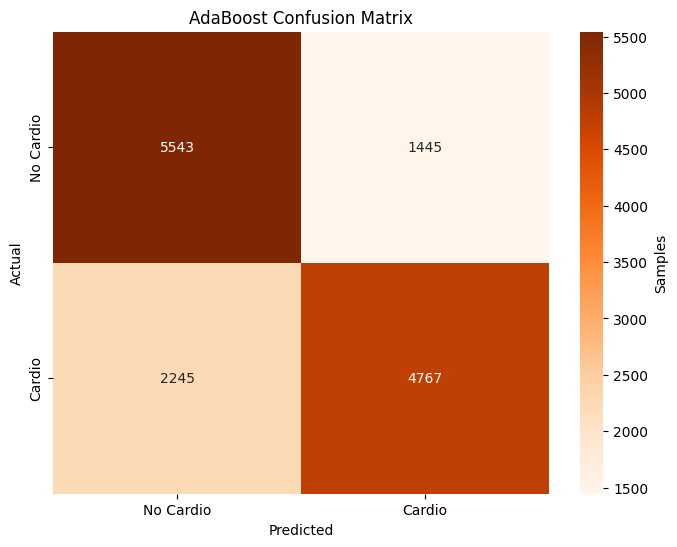

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Load dataset
health_data = pd.read_csv("health_data.csv")

# Prepare features and target
X = health_data.drop(columns=["cardio"])
y = health_data["cardio"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize base learner (a shallow tree)
base_estimator = DecisionTreeClassifier(max_depth=5)

# Initialize AdaBoost
ada_clf = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)

# Train the model
ada_clf.fit(X_train, y_train)

# Make predictions
y_pred = ada_clf.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f"AdaBoost Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=["No Cardio", "Cardio"],
            yticklabels=["No Cardio", "Cardio"],
            cbar_kws={'label': 'Samples'})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("AdaBoost Confusion Matrix")
plt.show()


## Gradient Boosting
[Gradient boosting](https://www.ibm.com/think/topics/boosting?mhsrc=ibmsearch_a&mhq=boosting) sequentially adds predictors to an ensemble with each one correcting for the errors of its predecessor. However, instead of changing weights of data points like AdaBoost, the gradient boosting trains on the residual errors of the previous predictor. The name, gradient boosting, is used since it combines the gradient descent algorithm and boosting method.


Gradient Boosting Accuracy: 0.7393

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75      6988
           1       0.76      0.70      0.73      7012

    accuracy                           0.74     14000
   macro avg       0.74      0.74      0.74     14000
weighted avg       0.74      0.74      0.74     14000



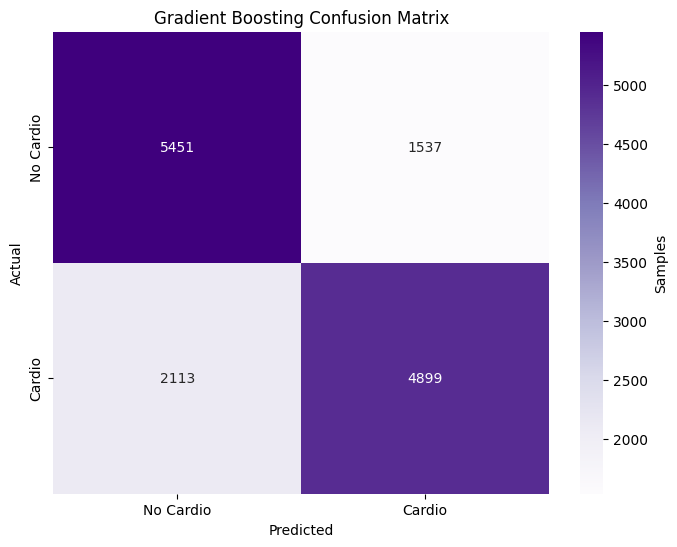

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(
    n_estimators=100,        # Number of boosting rounds
    learning_rate=0.1,       # Shrinks the contribution of each tree
    max_depth=5,             # Depth of each individual tree
    random_state=42
)

# Train the model
gb_clf.fit(X_train, y_train)

# Make predictions
y_pred = gb_clf.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Gradient Boosting Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=["No Cardio", "Cardio"],
            yticklabels=["No Cardio", "Cardio"],
            cbar_kws={'label': 'Samples'})
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Gradient Boosting Confusion Matrix")
plt.show()


/var/folders/xn/x7k911196hq4qns7w43lghhc0000gn/T/ipykernel_18359/2829849796.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='Set2')


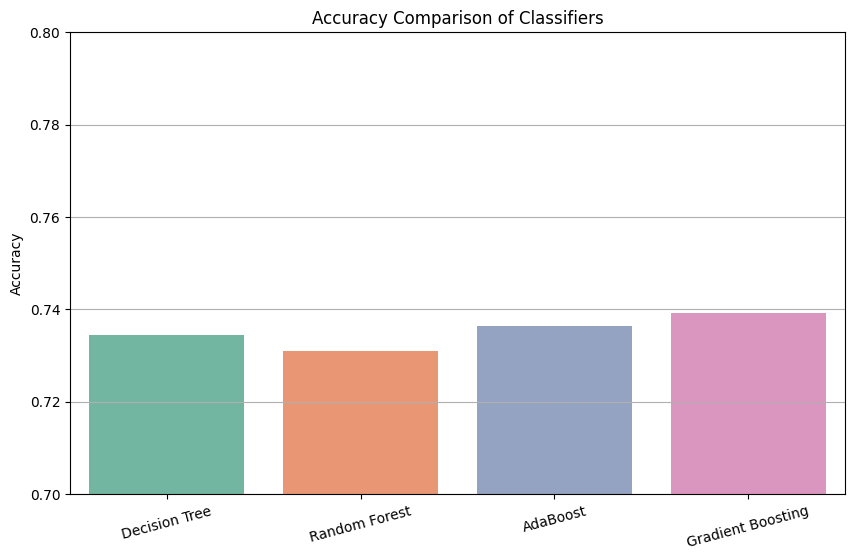

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Define and store accuracy scores
models = {
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(max_depth=5, n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5), n_estimators=50, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
}

accuracies = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)

# Plotting
plt.figure(figsize=(10,6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette='Set2')
plt.title("Accuracy Comparison of Classifiers")
plt.ylabel("Accuracy")
plt.ylim(0.7, 0.8)
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.show()

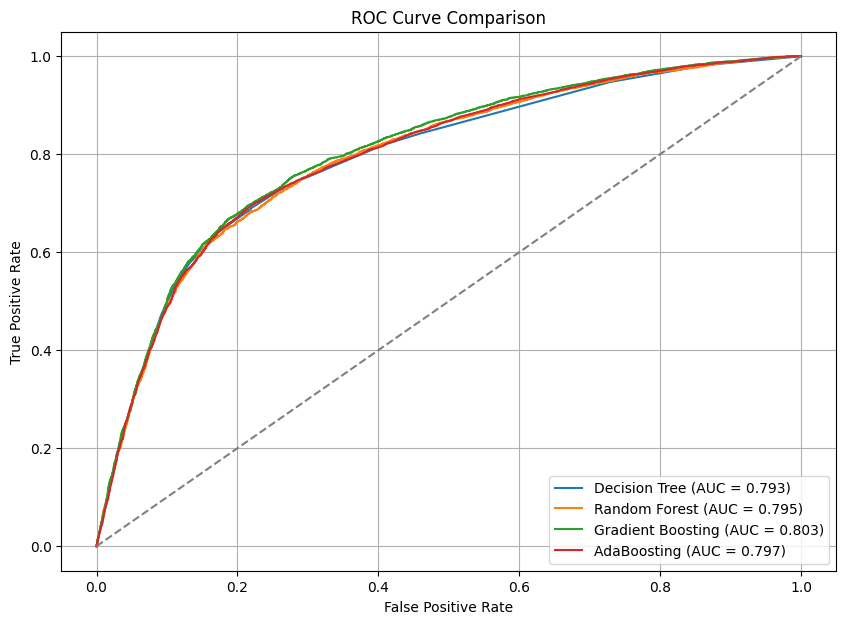

In [34]:
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier


# Train Decision Tree
dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_clf.fit(X_train, y_train)

rf_clf = RandomForestClassifier(max_depth=5, random_state=42)
rf_clf.fit(X_train, y_train)

# Make sure each model is trained already
models = {
    "Decision Tree": dt_clf,
    "Random Forest": rf_clf,
    "Gradient Boosting": gb_clf,
    "AdaBoosting": ada_clf
}

plt.figure(figsize=(10, 7))

for name, model in models.items():
    # Get predicted probabilities for the positive class
    y_probs = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)
    
    # Plot each model's curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

# Plot formatting
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

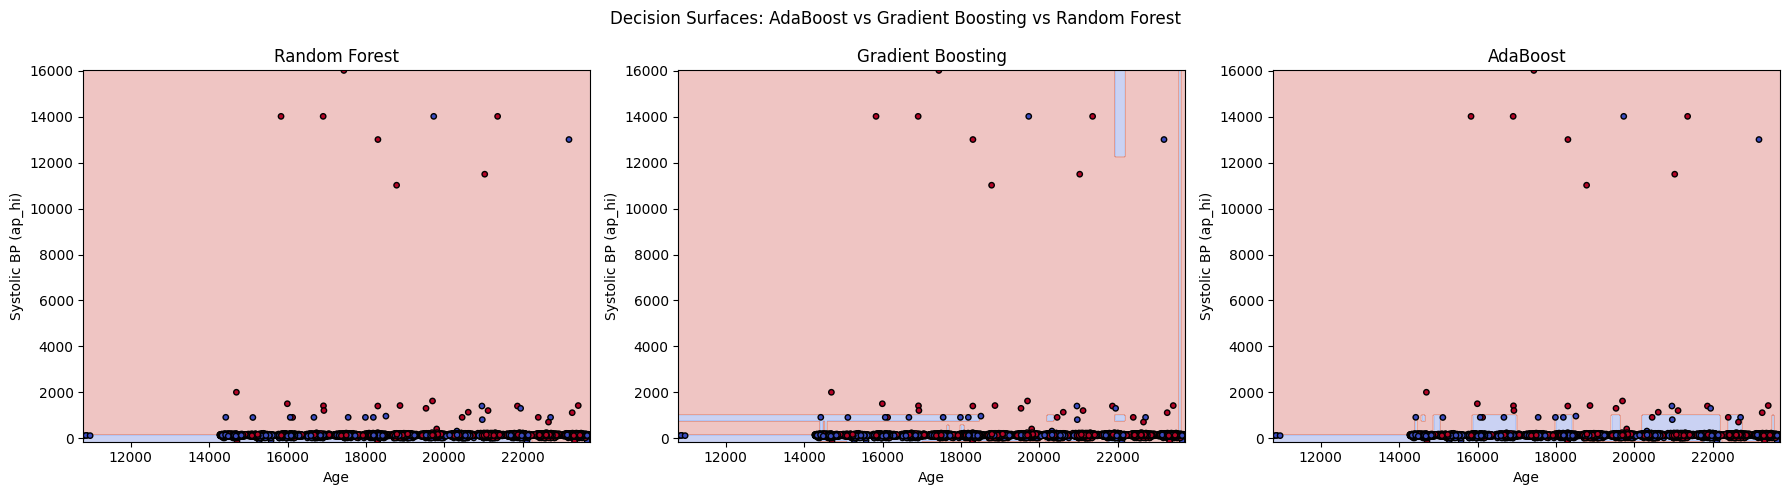

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Select 2 features for plotting
X_vis = X[["age", "ap_hi"]]  # Replace with any 2 numeric features you prefer
y_vis = y

# Define models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=50, max_depth=5, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=5, random_state=42),
    "AdaBoost": AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5), n_estimators=50, learning_rate=1.0, random_state=42)
}

# Create mesh grid
x_min, x_max = X_vis["age"].min() - 5, X_vis["age"].max() + 5
y_min, y_max = X_vis["ap_hi"].min() - 5, X_vis["ap_hi"].max() + 5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Train and plot each model
for ax, (name, model) in zip(axes, models.items()):
    model.fit(X_vis, y_vis)
    grid_df = pd.DataFrame(np.c_[xx.ravel(), yy.ravel()], columns=["age", "ap_hi"])
    Z = model.predict(grid_df)
    Z = Z.reshape(xx.shape)
    
    # Decision surface
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    
    # Scatter original data
    scatter = ax.scatter(X_vis["age"], X_vis["ap_hi"], c=y_vis, s=15, cmap=plt.cm.coolwarm, edgecolor='k')
    ax.set_title(name)
    ax.set_xlabel("Age")
    ax.set_ylabel("Systolic BP (ap_hi)")

plt.suptitle("Decision Surfaces: AdaBoost vs Gradient Boosting vs Random Forest")
plt.tight_layout()
plt.show()
